LAB-6 Computational Part 

Interest lies in developing a model that relates a player’s annual salary to their previous performance. Your job in this Lab is to investigate several such models. Where computation is required, you must perform the calculations in R. For bonus points you
may also perform the calculations using Python (though this is not required).


In [1]:
import os 
import random
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula as smf
import scipy.stats as stats
from scipy.stats import t as tdist
from statsmodels.stats.outliers_influence import summary_table
from sklearn.linear_model import LinearRegression 
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

/Users/sahiljain/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.getcwd()

'/Users/sahiljain'

In [3]:
os.chdir("/Users/sahiljain/Downloads/")

In [4]:
hitters = pd.read_csv("hitters.csv")
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

Pre-Processing data 

In [5]:
y = hitters.Salary
x = hitters.drop(['Salary', 'League', 'Division','NewLeague'], axis = 1)
X = pd.concat([x, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

(A)  Fit ridge and LASSO regression models for 1000 values of 𝜆 in the range 0.001 to 10^10. For each type of model construct a plot of the parameter estimates versus 𝜆, with each individual parameter represented as a line of a different color on these plots.


In [6]:
alphas = np.logspace(10, -3, 1000)

Ridge regression and Plot

In [7]:
ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept = True, normalize = True)
    ridge.fit(X,y)
    ridge_coefs.append(ridge.coef_)

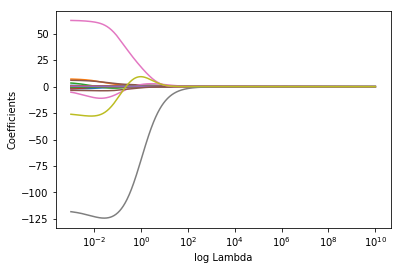

In [8]:
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('log Lambda')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

Lasso regression and Plot 

In [9]:
lasso_coefs = []
for a in alphas:
    lasso = Lasso(alpha = a, fit_intercept = True, normalize = True)
    lasso.fit(X,y)
    lasso_coefs.append(lasso.coef_)

/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


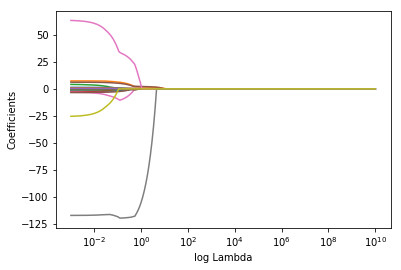

In [10]:
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('log Lambda')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

(B)  Randomly split the observed data into a training set with 210 observations and a held-out test set containing 53 observations. For purposes of reproducibility,please set the seed to be 1 using the command set.seed(1).

In [11]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
train = pd.concat([X_train, y_train], axis = 1)

(C) Using 10-fold cross validation on the training data, find the best ridge regression model. That is, find the optimal value of 𝜆 and the 𝛽 estimates that this corresponds to.

In [12]:
ridgeCV = RidgeCV(alphas = alphas, scoring = 'mean_squared_error', normalize = True)
ridgeCV.fit(X_train, y_train)
ridgeCV.alpha_

/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sahiljain/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

0.011669898186171451

In [13]:
ridge2 = Ridge(alpha = ridgeCV.alpha_, normalize = True)
ridge2.fit(X_train, y_train)
pd.DataFrame(ridge2.coef_, index = X.columns)

,0
AtBat,-1.689473
Hits,5.732945
HmRun,-2.417603
Runs,0.394569
RBI,0.924153
Walks,4.201748
Years,-6.650422
CAtBat,-0.072997
CHits,0.218749
CHmRun,1.195369


(D) Using 10-fold cross validation on the training data, find the best LASSO regression model. That is, find the optimal value of 𝜆 and the 𝛽 estimates that this corresponds to.

In [15]:
lassoCV = LassoCV(alphas = None, cv = 10, normalize = True)
lassoCV.fit(X_train, y_train)
lassoCV.alpha_

0.24258426098354494

In [16]:
lasso2 = Lasso(alpha = lassoCV.alpha_, normalize = True)
lasso2.fit(X_train, y_train)
pd.DataFrame(lasso2.coef_, index = X.columns)

,0
AtBat,-1.555601
Hits,6.114435
HmRun,-0.000000
Runs,0.000000
RBI,0.000000
Walks,3.665504
Years,-5.711557
CAtBat,-0.000000
CHits,0.000000
CHmRun,1.006255


(E) Compare and contrast the model from part (C) and (D) 

If we look at the two models we can clearly see the differences, Ridge does not zero the coeffiecients where as lasso zero's the coefficients. Apart from that the best lambda value in both cases is completely different of each other. Lambda value in Lasso in python is significantly greater than lambda value in ridge. 

(F) Compare the predictive accuracy of the best ridge and LASSO regression models from parts (C) and (D), and the best stepwise selection model from Lab 5 (which included the predictors AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWalks, DivisionW, PutOuts and Assists. In particular, use these models to predict the observations from the held-out test set and calculate the corresponding root mean squared error (RMSE) in each case. Based on this criterion, which model is the best?

In [17]:
ridge3 = Ridge(alpha = ridgeCV.alpha_, normalize = True)
ridge3.fit(X_train, y_train)
pred1 = ridge3.predict(X_test)
RMSE1 = np.sqrt(np.mean((y_test - pred1)**2))
RMSE1

355.2273433008744

In [18]:
lasso3 = Lasso(alpha = lassoCV.alpha_, normalize = True)
lasso3.fit(X_train, y_train)
pred2 = lasso3.predict(X_test)
RMSE2 = np.sqrt(np.mean((y_test - pred2)**2))
RMSE2

353.5201794097685

In [19]:
numfolds = 10
kf = KFold(n=263, n_folds=numfolds, shuffle = True)
MSE = 0
for train_indices, test_indices in kf:
    train_X = X.ix[train_indices, :]; train_y = y[train_indices]
    test_X = X.ix[test_indices, :]; test_y = y[test_indices]
    training = pd.concat([train_X, train_y], axis = 1)
    m3 = smf.ols('Salary ~ AtBat + Hits + CAtBat + CRuns + CRBI + CWalks + Division_W + PutOuts + Assists', data = train).fit()   
    pred = m3.predict(test_X)
    MSE = MSE + np.mean((test_y - pred)**2)
RMSE3 = np.sqrt(MSE/numfolds)
RMSE3

/Users/sahiljain/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


315.4676588291934

Based over these criterion the best subset model is the best stepwise selection model, because RMSE is smallest in the stepwise selection model.

Work Cited : too much stack overflow, scikit learn examples and github code. 